# Wine Dataset Cleaning and Adjustment

By Zach Grammer | B.S. Computer Science CofC, Vice President Data Science Club


## Overview
This notebook focuses on cleaning and exploratory analysis of wine data, addressing variations in ratings, adjusting for reviewer biases, and preparing the data for machine learning applications. Key steps include handling missing values, normalizing ratings, and performing exploratory data analysis (EDA) to uncover meaningful trends.

## Data Cleaning
1. **Handling Missing Values**:
   - Dropped columns with excessive null values.
   - Addressed missing entries in critical features to retain data integrity.

2. **Rating Normalization**:
   - Identified variations in reviewer scales (e.g., 12-20 scale by specific reviewers).
   - Normalized ratings to ensure consistency across reviewers.

3. **Outlier Adjustment**:
   - Analyzed and adjusted outliers in features like price and ratings to improve data quality.

## Exploratory Data Analysis (EDA)
1. **Reviewers**:
   - Normalized reviewer ratings to adjust for biases.
   - Observed significant disparities in grading scales.

2. **Wine Characteristics**:
   - Explored color/type correlations with price and ratings.
   - Identified red wines as slightly higher-priced and more favored, with white wines being the least.

3. **Country Analysis**:
   - France emerged as the top region for price and ratings.
   - Observed discrepancies in ratings for regions like Greece due to reviewer biases.

4. **Vintage Analysis**:
   - Confirmed that older wines tend to be more highly rated.
   - Proposed simplifying vintage data representation for modeling.

## Next Steps
The cleaned and adjusted dataset is ready for further modeling. Future steps include:
- Feature engineering (e.g., consolidating vintage data).
- Model development and evaluation to predict wine prices and ratings.

In [1]:
import pandas as pd

df = pd.read_excel('amazon_wine.xlsx')

df.head()

,Producer,Product,Link,Price,Stock Availability,Bottle Size,Ratings,Reviewers,Description,Vintage,Variety,Region,Color/Type,Country,Appellation,SubRegion
0,Salon,2013 Salon - Champagne Brut Blanc de Blancs Le...,https://bassins.com/2013-salon-brut-blanc-de-b...,2900.0,1,1.5L,99,VM,"The 2013 is the most powerful, dense young Sal...",2013,Champagne,Champagne,Sparkling,France,Champagne,NaN
1,Georges Roumier,1999 Georges Roumier Bonnes Mares,https://bassins.com/1999-georges-roumier-bonne...,2700.0,3,750ml,97,VM,"Good deep red. Aromas of black raspberry, grap...",1999,Pinot Noir/Pinot Nero,Burgundy,Red,France,Bonnes Mares,NaN
2,Henri Boillot,2020 Henri Boillot Montrachet,https://bassins.com/2020-henri-boillot-montrac...,2499.0,1,750ml,96-99,JM,1 x 350 litre barrel. Not especially deep in c...,2020,Chardonnay,Burgundy,White,France,Montrachet,NaN
3,Giacosa,2016 Giacosa - Barbaresco Riserva Asili DOUBLE...,https://bassins.com/2016-giacosa-barbaresco-ri...,2400.0,1,3L,97+,WA,"Packaged in its distinctive red label, the 201...",2016,Nebbiolo,Piemonte,Red,Italy,Barbaresco DOCG,NaN
4,Krug,2008 Krug - Brut Clos du Mesnil,https://bassins.com/2008-krug-brut-clos-du-mesnil,2100.0,2,750ml,99,VM,"Krug’s 2008 Clos du Mesnil, tasted from two bo...",2008,Champagne,Champagne,Sparkling,France,Brut,NaN


In [2]:
null_counts = df.isnull().sum()
print("Null count in each column:")
print(null_counts)

total_rows = df.shape[0]
print("\nTotal number of rows:")
print(total_rows)

Null count in each column:
Producer                 0
Product                  0
Link                     0
Price                    0
Stock Availability       0
Bottle Size              0
Ratings               1330
Reviewers             1330
Description           1394
Vintage                 36
Variety                360
Region                   4
Color/Type               0
Country                  0
Appellation            147
SubRegion             3193
dtype: int64

Total number of rows:
3314


In [3]:
df0 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Reviewers', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation', 'Description', 'Ratings'])
for column in df0.columns:
    print(f"Column '{column}' has {df0[column].nunique()} distinct values.")

Column 'Producer' has 701 distinct values.
Column 'Product' has 1539 distinct values.
Column 'Link' has 1544 distinct values.
Column 'Price' has 293 distinct values.
Column 'Stock Availability' has 106 distinct values.
Column 'Bottle Size' has 6 distinct values.
Column 'Ratings' has 81 distinct values.
Column 'Reviewers' has 12 distinct values.
Column 'Description' has 1494 distinct values.
Column 'Vintage' has 31 distinct values.
Column 'Variety' has 45 distinct values.
Column 'Region' has 63 distinct values.
Column 'Color/Type' has 5 distinct values.
Column 'Country' has 14 distinct values.
Column 'Appellation' has 253 distinct values.
Column 'SubRegion' has 41 distinct values.


In [4]:
null_counts = df0.isnull().sum()
print("Null count in each column:")
print(null_counts)

total_rows = df0.shape[0]
print("\nTotal number of rows:")
print(total_rows)

Null count in each column:
Producer                 0
Product                  0
Link                     0
Price                    0
Stock Availability       0
Bottle Size              0
Ratings                  0
Reviewers                0
Description              0
Vintage                  0
Variety                  0
Region                   0
Color/Type               0
Country                  0
Appellation              0
SubRegion             1480
dtype: int64

Total number of rows:
1544


#### Some ratings values appear in scales. This could be circumvented by averaging out the scale, but for initial EDA, these rows were dropped.

In [5]:
print(df0['Ratings'].unique())

[99 97 '96-99' '97+' 95 '94-96' '95-97' '98+' 94 100 '95-97+' '98-100' 98
 '(96-98)' '97-99' '96-98' 96 '92-94' '96+' '93+' '95+' '94-96+' '93-95'
 '97-100' '98-99' '90-92' '91+' '(93-95+)' '(95-98)' '93-95+' 93 '96-98+'
 92 '(91-94)' '(98-100)' '(94-96)' '(93-95)' '92-94+' '91-93' 91 '96-100'
 '96-97' '94+' '94-97' '91-93+' '92-95' '97-99+' '99-100' '95-96' '95-98'
 '91-94' '90-92+' '89-91' '88-90' '89-92' '91-92' 90 89 '92+' '87-90'
 '94-95' '(96-98+)' '90+' 88 '(95-96)' '(94-95)' '93-96' '90-93' '88-89'
 17 '93-94' 17.5 '(91-92)' '(92-94)' '(90-92)' '(90-93)' 86 '(91-93)'
 '93-93' 16 87]


# Reviewers EDA
### Analyzing the count of reviews by each reviewer and the unique values of ratings. I found that one reviewer, JR, grades on a scale of 12-20. To help adjust for the rating variation between reviewers, I have added a separate column that normalizes the "Ratings" column in correspondence with the ratings given by each reviewer. This will allow for a more level understanding of how wines are valued in a general sense without any reviewer bias.

In [6]:
df1 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Reviewers', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation', 'Description', 'Ratings'])

In [7]:
df1.loc[:, 'Ratings'] = pd.to_numeric(df1['Ratings'], errors='coerce')
df1.loc[:, 'Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3290
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            1544 non-null   object 
 1   Product             1544 non-null   object 
 2   Link                1544 non-null   object 
 3   Price               1544 non-null   float64
 4   Stock Availability  1544 non-null   int64  
 5   Bottle Size         1544 non-null   object 
 6   Ratings             1049 non-null   object 
 7   Reviewers           1544 non-null   object 
 8   Description         1544 non-null   object 
 9   Vintage             1544 non-null   object 
 10  Variety             1544 non-null   object 
 11  Region              1544 non-null   object 
 12  Color/Type          1544 non-null   object 
 13  Country             1544 non-null   object 
 14  Appellation         1544 non-null   object 
 15  SubRegion           64 non-null     object 
dtypes: float64(

In [8]:
for column in df1.columns:
    print(f"Column '{column}' has {df1[column].nunique()} distinct values.")

Column 'Producer' has 701 distinct values.
Column 'Product' has 1539 distinct values.
Column 'Link' has 1544 distinct values.
Column 'Price' has 293 distinct values.
Column 'Stock Availability' has 106 distinct values.
Column 'Bottle Size' has 6 distinct values.
Column 'Ratings' has 18 distinct values.
Column 'Reviewers' has 12 distinct values.
Column 'Description' has 1494 distinct values.
Column 'Vintage' has 31 distinct values.
Column 'Variety' has 45 distinct values.
Column 'Region' has 63 distinct values.
Column 'Color/Type' has 5 distinct values.
Column 'Country' has 14 distinct values.
Column 'Appellation' has 253 distinct values.
Column 'SubRegion' has 41 distinct values.


In [9]:
df1 = df1[['Price', 'Ratings', 'Reviewers']]
df1_encoded = pd.get_dummies(df1, columns=['Reviewers'])

In [10]:
df1_encoded = df1_encoded.dropna(subset=['Ratings'])

In [11]:
column_sums = df1_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price           148081.66
Ratings           98080.5
Reviewers_BH            7
Reviewers_DC           12
Reviewers_JA           19
Reviewers_JD           77
Reviewers_JG            2
Reviewers_JM            3
Reviewers_JR            9
Reviewers_JS          151
Reviewers_VM          361
Reviewers_WA          286
Reviewers_WE           35
Reviewers_WS           87
dtype: object

In [12]:
print(df1['Ratings'].unique())

[99.0 97.0 nan 95.0 94.0 100.0 98.0 96.0 93.0 92.0 91.0 90.0 89.0 88.0
 17.0 17.5 86.0 16.0 87.0]


In [13]:
# Filter rows with any NaN values
nan_rows = df1[df1.isnull().any(axis=1)]

# Count the occurrences of each reviewer in the filtered rows
reviewer_counts = nan_rows['Reviewers'].value_counts()

print("Count of each reviewer in rows with NaN:")
print(reviewer_counts)

Count of each reviewer in rows with NaN:
Reviewers
VM    193
WA    170
JD     92
BH     19
JS     14
JM      3
JA      2
JG      1
DC      1
Name: count, dtype: int64


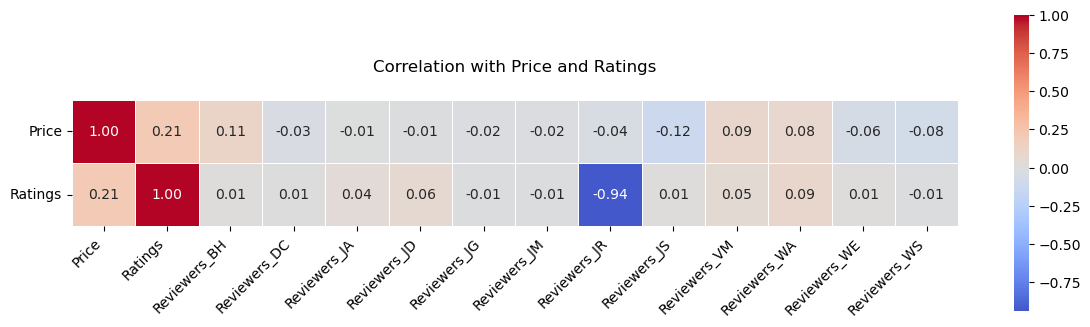

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df1_encoded.corr()

selected_vars = ['Price', 'Ratings']
focused_corr = corr_matrix.loc[selected_vars]

plt.figure(figsize=(12, 4)) 

sns.heatmap(
    focused_corr,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Correlation with Price and Ratings', pad=20)

plt.show()

In [15]:
df1[df1['Reviewers'] == 'JR'].head(10)

,Price,Ratings,Reviewers
1983,44.99,17.0,JR
2026,42.99,17.5,JR
2135,39.99,17.0,JR
2205,36.99,17.0,JR
2255,34.99,17.0,JR
2541,27.99,17.5,JR
2761,23.99,17.5,JR
3012,18.99,16.0,JR
3290,9.99,16.0,JR


In [16]:
df1[df1['Ratings'].isna()].head(10)

,Price,Ratings,Reviewers
2,2499.0,NaN,JM
3,2400.0,NaN,WA
9,1699.0,NaN,WA
10,1699.0,NaN,WA
12,1549.0,NaN,WA
13,1450.0,NaN,VM
14,1440.0,NaN,WA
27,1099.0,NaN,WA
28,1065.0,NaN,WA
47,899.0,NaN,VM


# Color/Type EDA
### For each of the following column analyses, there is a correlation plot of just price for a wider range of data, and a correlation plot with price, ratings, and normalized ratings that only holds rows with a description and rating. This allows us to understand both sides of the data. On the larger portion of data, red appears to possess a slightly higher value than other colors, but when looking at the smaller data, this correlation falls, and the ratings of red show that is it the most favored. This shows that red wine will have a slightly higher price and rating than other colors. White wine, on the other hand, is the lowest-priced and least favored wine of the colors we have.

In [17]:
df2 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation'])

In [18]:
df2 = df2.drop(columns=['Ratings', 'Reviewers', 'Description', 'SubRegion'])

In [19]:
df2.loc[:, 'Price'] = pd.to_numeric(df2['Price'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            2773 non-null   object 
 1   Product             2773 non-null   object 
 2   Link                2773 non-null   object 
 3   Price               2773 non-null   float64
 4   Stock Availability  2773 non-null   int64  
 5   Bottle Size         2773 non-null   object 
 6   Vintage             2773 non-null   object 
 7   Variety             2773 non-null   object 
 8   Region              2773 non-null   object 
 9   Color/Type          2773 non-null   object 
 10  Country             2773 non-null   object 
 11  Appellation         2773 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 281.6+ KB


In [20]:
df2 = df2[['Price', 'Color/Type']]
df2_encoded = pd.get_dummies(df2, columns=['Color/Type'])

In [21]:
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 2773 non-null   float64
 1   Color/Type_Fortified  2773 non-null   bool   
 2   Color/Type_Red        2773 non-null   bool   
 3   Color/Type_Rose       2773 non-null   bool   
 4   Color/Type_Sake       2773 non-null   bool   
 5   Color/Type_Sherry     2773 non-null   bool   
 6   Color/Type_Sparkling  2773 non-null   bool   
 7   Color/Type_White      2773 non-null   bool   
dtypes: bool(7), float64(1)
memory usage: 62.3 KB


In [22]:
column_sums = df2_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                   327938.53
Color/Type_Fortified       123.00
Color/Type_Red            1785.00
Color/Type_Rose             24.00
Color/Type_Sake              7.00
Color/Type_Sherry           30.00
Color/Type_Sparkling       118.00
Color/Type_White           686.00
dtype: float64

In [23]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df2_encoded = df2_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df2_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                   327938.53
Color/Type_Fortified       123.00
Color/Type_Red            1785.00
Color/Type_Rose             24.00
Color/Type_Sherry           30.00
Color/Type_Sparkling       118.00
Color/Type_White           686.00
dtype: float64


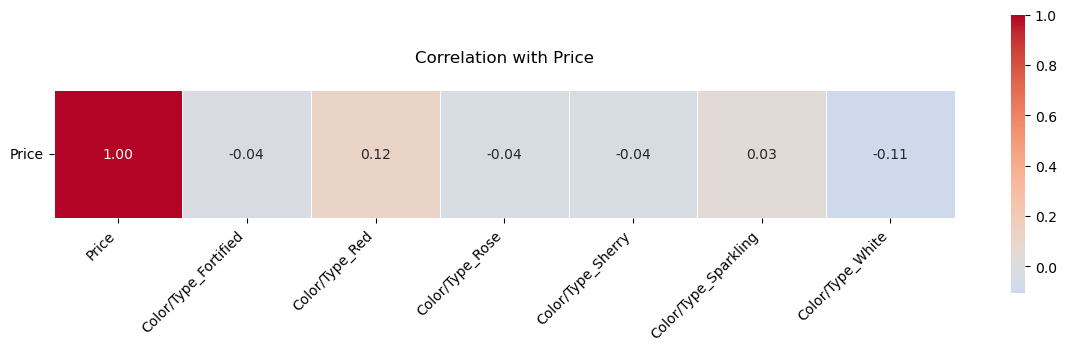

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df2_encoded.corr()

selected_vars = ['Price']
focused_corr = corr_matrix.loc[selected_vars]

plt.figure(figsize=(12, 4))

sns.heatmap(
    focused_corr,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Correlation with Price', pad=20)

plt.show()

In [25]:
df3 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Reviewers', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation', 'Description', 'Ratings'])

In [26]:
df3.loc[:, 'Ratings'] = pd.to_numeric(df3['Ratings'], errors='coerce')
df3.loc[:, 'Price'] = pd.to_numeric(df3['Price'], errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3290
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            1544 non-null   object 
 1   Product             1544 non-null   object 
 2   Link                1544 non-null   object 
 3   Price               1544 non-null   float64
 4   Stock Availability  1544 non-null   int64  
 5   Bottle Size         1544 non-null   object 
 6   Ratings             1049 non-null   object 
 7   Reviewers           1544 non-null   object 
 8   Description         1544 non-null   object 
 9   Vintage             1544 non-null   object 
 10  Variety             1544 non-null   object 
 11  Region              1544 non-null   object 
 12  Color/Type          1544 non-null   object 
 13  Country             1544 non-null   object 
 14  Appellation         1544 non-null   object 
 15  SubRegion           64 non-null     object 
dtypes: float64(

In [27]:
print(df3['Ratings'].describe())

count     1049.0
unique      18.0
top         94.0
freq       155.0
Name: Ratings, dtype: float64


In [28]:
for column in df3.columns:
    print(f"Column '{column}' has {df3[column].nunique()} distinct values.")

Column 'Producer' has 701 distinct values.
Column 'Product' has 1539 distinct values.
Column 'Link' has 1544 distinct values.
Column 'Price' has 293 distinct values.
Column 'Stock Availability' has 106 distinct values.
Column 'Bottle Size' has 6 distinct values.
Column 'Ratings' has 18 distinct values.
Column 'Reviewers' has 12 distinct values.
Column 'Description' has 1494 distinct values.
Column 'Vintage' has 31 distinct values.
Column 'Variety' has 45 distinct values.
Column 'Region' has 63 distinct values.
Column 'Color/Type' has 5 distinct values.
Column 'Country' has 14 distinct values.
Column 'Appellation' has 253 distinct values.
Column 'SubRegion' has 41 distinct values.


In [29]:
# Ensure df3 is a copy of the DataFrame, not a view
df3 = df3.copy()

# Define a normalization function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Group by "Reviewers" and normalize "Ratings" within each group
df3['Normalized_Ratings'] = df3.groupby('Reviewers')['Ratings'].transform(normalize)

print(df3[['Reviewers', 'Ratings', 'Normalized_Ratings']].head())


  Reviewers Ratings Normalized_Ratings
0        VM    99.0           0.916667
1        VM    97.0               0.75
2        JM     NaN                NaN
3        WA     NaN                NaN
4        VM    99.0           0.916667


In [30]:
df3 = df3[['Price', 'Ratings', 'Normalized_Ratings', 'Color/Type']]
df3_encoded = pd.get_dummies(df3, columns=['Color/Type'])

In [31]:
df3_encoded = df3_encoded.dropna(subset=['Ratings'])

In [32]:
column_sums = df3_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                    148081.66
Ratings                    98080.5
Normalized_Ratings      555.838961
Color/Type_Fortified            36
Color/Type_Red                 766
Color/Type_Rose                  1
Color/Type_Sparkling            38
Color/Type_White               208
dtype: object

In [33]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df3_encoded = df3_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df3_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                    148081.66
Ratings                    98080.5
Normalized_Ratings      555.838961
Color/Type_Fortified            36
Color/Type_Red                 766
Color/Type_Sparkling            38
Color/Type_White               208
dtype: object


In [34]:
print(df3['Ratings'].unique())

[99.0 97.0 nan 95.0 94.0 100.0 98.0 96.0 93.0 92.0 91.0 90.0 89.0 88.0
 17.0 17.5 86.0 16.0 87.0]


In [35]:
print(df3['Normalized_Ratings'].unique())

[0.9166666666666666 0.75 nan 0.5833333333333334 0.5 1.0 0.9285714285714286
 0.8571428571428571 0.6666666666666666 0.6428571428571429 0.4
 0.7857142857142857 0.9 0.8333333333333334 0.5714285714285714
 0.7272727272727273 0.7 0.4166666666666667 0.7142857142857143 0.8
 0.3333333333333333 0.9090909090909091 0.8181818181818182
 0.35714285714285715 0.45454545454545453 0.18181818181818182 0.6 0.25
 0.16666666666666666 0.5454545454545454 0.6363636363636364 0.2
 0.42857142857142855 0.3 0.2857142857142857 0.36363636363636365
 0.2727272727272727 0.08333333333333333 0.1 0.14285714285714285 0.0
 0.09090909090909091 0.21428571428571427]


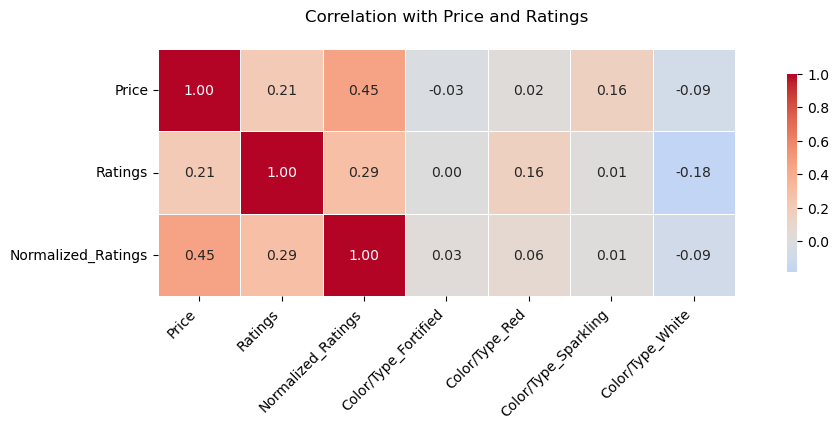

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df3_encoded.corr()

selected_vars = ['Price', 'Ratings', 'Normalized_Ratings']
focused_corr = corr_matrix.loc[selected_vars]

plt.figure(figsize=(12, 4)) 

sns.heatmap(
    focused_corr,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Correlation with Price and Ratings', pad=20)

plt.show()

# Country EDA
### There are two obvious conclusions to draw from these correlations, France wine is the most expensive and the most favored, while Italy wine is the least expensive and least favored. A few notable understandings come from the fact that Greece appears to be heavily disliked when looking at the ratings, but the normalized ratings paint a different picture. This discrepancy comes from the fact that most Greece wine reviews are done by JR, who rates on the 12-20 scale as noted before. These normalized ratings show that without inherent reviewer bias, France is well-received, while Italy is not.

In [37]:
df4 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation'])

In [38]:
df4 = df4.drop(columns=['Ratings', 'Reviewers', 'Description', 'SubRegion'])

In [39]:
df4.loc[:, 'Price'] = pd.to_numeric(df4['Price'], errors='coerce')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            2773 non-null   object 
 1   Product             2773 non-null   object 
 2   Link                2773 non-null   object 
 3   Price               2773 non-null   float64
 4   Stock Availability  2773 non-null   int64  
 5   Bottle Size         2773 non-null   object 
 6   Vintage             2773 non-null   object 
 7   Variety             2773 non-null   object 
 8   Region              2773 non-null   object 
 9   Color/Type          2773 non-null   object 
 10  Country             2773 non-null   object 
 11  Appellation         2773 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 281.6+ KB


In [40]:
for column in df4.columns:
    print(f"Column '{column}' has {df4[column].nunique()} distinct values.")

Column 'Producer' has 1266 distinct values.
Column 'Product' has 2767 distinct values.
Column 'Link' has 2773 distinct values.
Column 'Price' has 322 distinct values.
Column 'Stock Availability' has 114 distinct values.
Column 'Bottle Size' has 9 distinct values.
Column 'Vintage' has 43 distinct values.
Column 'Variety' has 51 distinct values.
Column 'Region' has 132 distinct values.
Column 'Color/Type' has 7 distinct values.
Column 'Country' has 29 distinct values.
Column 'Appellation' has 532 distinct values.


In [41]:
df4 = df4[['Price', 'Country']]
df4_encoded = pd.get_dummies(df4, columns=['Country'])

In [42]:
df4_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       2773 non-null   float64
 1   Country_Argentina           2773 non-null   bool   
 2   Country_Armenia             2773 non-null   bool   
 3   Country_Australia           2773 non-null   bool   
 4   Country_Austria             2773 non-null   bool   
 5   Country_Bosnia-Herzegovina  2773 non-null   bool   
 6   Country_Bulgaria            2773 non-null   bool   
 7   Country_Chile               2773 non-null   bool   
 8   Country_Croatia             2773 non-null   bool   
 9   Country_England             2773 non-null   bool   
 10  Country_France              2773 non-null   bool   
 11  Country_Georgia             2773 non-null   bool   
 12  Country_Germany             2773 non-null   bool   
 13  Country_Greece              2773 non-n

In [43]:
column_sums = df4_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                         327938.53
Country_Argentina                 22.00
Country_Armenia                    5.00
Country_Australia                 18.00
Country_Austria                   15.00
Country_Bosnia-Herzegovina         1.00
Country_Bulgaria                  20.00
Country_Chile                     16.00
Country_Croatia                    3.00
Country_England                    1.00
Country_France                  1239.00
Country_Georgia                    7.00
Country_Germany                   74.00
Country_Greece                    36.00
Country_Hungary                    5.00
Country_Israel                     2.00
Country_Italy                    640.00
Country_Japan                      6.00
Country_Lebanon                    7.00
Country_Moldova                   12.00
Country_New Zealand               23.00
Country_North Macedonia            4.00
Country_Portugal                 133.00
Country_Serbia                     3.00
Country_Slovenia                   6.00


In [44]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df4_encoded = df4_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df4_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                   327938.53
Country_Argentina           22.00
Country_Australia           18.00
Country_Austria             15.00
Country_Bulgaria            20.00
Country_Chile               16.00
Country_France            1239.00
Country_Germany             74.00
Country_Greece              36.00
Country_Italy              640.00
Country_Moldova             12.00
Country_New Zealand         23.00
Country_Portugal           133.00
Country_South Africa        19.00
Country_Spain               69.00
Country_USA                381.00
dtype: float64


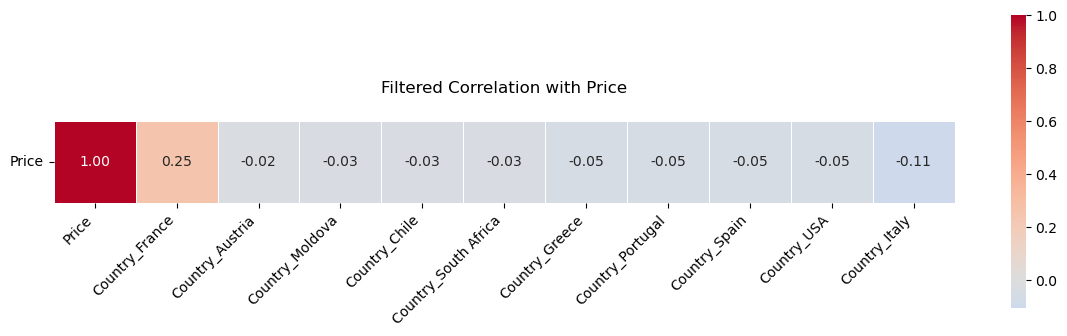

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr_matrix = df4_encoded.corr()

# Select only the 'Price' correlations
selected_vars = ['Price']
focused_corr = corr_matrix.loc[selected_vars].squeeze()

# Sort correlations in descending order
sorted_corr = focused_corr.sort_values(ascending=False)

# Select the largest 6 correlations (most positive) and smallest 5 correlations (most negative)
top_6 = sorted_corr.head(6)  # Largest 6 correlations
bottom_5 = sorted_corr.tail(5)  # Smallest 5 correlations

# Combine the largest 6 and smallest 5 correlations
filtered_corr = pd.concat([top_6, bottom_5])

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 4))

sns.heatmap(
    filtered_corr.to_frame().T,  # Convert Series to DataFrame for heatmap
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Filtered Correlation with Price', pad=20)

plt.show()


In [46]:
df5 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Reviewers', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation', 'Description', 'Ratings'])

In [47]:
df5.loc[:, 'Ratings'] = pd.to_numeric(df5['Ratings'], errors='coerce')
df5.loc[:, 'Price'] = pd.to_numeric(df5['Price'], errors='coerce')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3290
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            1544 non-null   object 
 1   Product             1544 non-null   object 
 2   Link                1544 non-null   object 
 3   Price               1544 non-null   float64
 4   Stock Availability  1544 non-null   int64  
 5   Bottle Size         1544 non-null   object 
 6   Ratings             1049 non-null   object 
 7   Reviewers           1544 non-null   object 
 8   Description         1544 non-null   object 
 9   Vintage             1544 non-null   object 
 10  Variety             1544 non-null   object 
 11  Region              1544 non-null   object 
 12  Color/Type          1544 non-null   object 
 13  Country             1544 non-null   object 
 14  Appellation         1544 non-null   object 
 15  SubRegion           64 non-null     object 
dtypes: float64(

In [48]:
# Ensure df3 is a copy of the DataFrame, not a view
df5 = df5.copy()

# Define a normalization function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Group by "Reviewers" and normalize "Ratings" within each group
df5['Normalized_Ratings'] = df5.groupby('Reviewers')['Ratings'].transform(normalize)

print(df5[['Reviewers', 'Ratings', 'Normalized_Ratings']].head())


  Reviewers Ratings Normalized_Ratings
0        VM    99.0           0.916667
1        VM    97.0               0.75
2        JM     NaN                NaN
3        WA     NaN                NaN
4        VM    99.0           0.916667


In [49]:
df5 = df5[['Price', 'Ratings', 'Normalized_Ratings', 'Country']]
df5_encoded = pd.get_dummies(df5, columns=['Country'])

In [50]:
df5_encoded = df5_encoded.dropna(subset=['Ratings'])

In [51]:
column_sums = df5_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                    148081.66
Ratings                    98080.5
Normalized_Ratings      555.838961
Country_Argentina               15
Country_Australia                8
Country_Austria                  9
Country_Chile                   12
Country_France                 370
Country_Germany                 26
Country_Greece                   8
Country_Hungary                  1
Country_Italy                  357
Country_New Zealand              9
Country_Portugal                35
Country_South Africa             6
Country_Spain                   21
Country_USA                    172
dtype: object

In [52]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df5_encoded = df5_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df5_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                   148081.66
Ratings                   98080.5
Normalized_Ratings     555.838961
Country_Argentina              15
Country_Australia               8
Country_Austria                 9
Country_Chile                  12
Country_France                370
Country_Germany                26
Country_Greece                  8
Country_Italy                 357
Country_New Zealand             9
Country_Portugal               35
Country_Spain                  21
Country_USA                   172
dtype: object


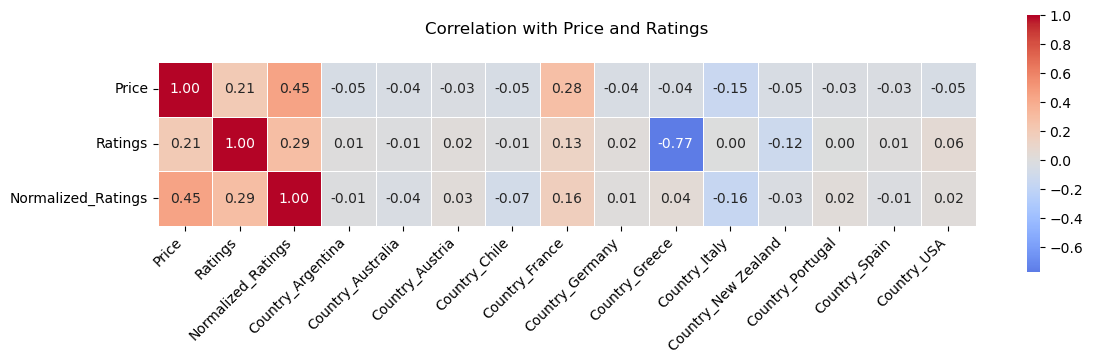

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df5_encoded.corr()

selected_vars = ['Price', 'Ratings', 'Normalized_Ratings']
focused_corr = corr_matrix.loc[selected_vars]

plt.figure(figsize=(12, 4)) 

sns.heatmap(
    focused_corr,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Correlation with Price and Ratings', pad=20)

plt.show()

# Vintage EDA
### Vintage analysis tells us exactly what we expect it to tell, older wine is more favored. This can likely be easily incorporated into a single column of just years instead of many one-hot encoded columns to make it more easily digestible by an ML or DL model.

In [54]:
df6 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation'])

In [55]:
df6 = df6.drop(columns=['Ratings', 'Reviewers', 'Description', 'SubRegion'])

In [56]:
df6.loc[:, 'Price'] = pd.to_numeric(df6['Price'], errors='coerce')
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            2773 non-null   object 
 1   Product             2773 non-null   object 
 2   Link                2773 non-null   object 
 3   Price               2773 non-null   float64
 4   Stock Availability  2773 non-null   int64  
 5   Bottle Size         2773 non-null   object 
 6   Vintage             2773 non-null   object 
 7   Variety             2773 non-null   object 
 8   Region              2773 non-null   object 
 9   Color/Type          2773 non-null   object 
 10  Country             2773 non-null   object 
 11  Appellation         2773 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 281.6+ KB


In [57]:
df6 = df6[['Price', 'Vintage']]
df6_encoded = pd.get_dummies(df6, columns=['Vintage'])

In [58]:
df6_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          2773 non-null   float64
 1   Vintage_1945   2773 non-null   bool   
 2   Vintage_1955   2773 non-null   bool   
 3   Vintage_1963   2773 non-null   bool   
 4   Vintage_1966   2773 non-null   bool   
 5   Vintage_1970   2773 non-null   bool   
 6   Vintage_1974   2773 non-null   bool   
 7   Vintage_1975   2773 non-null   bool   
 8   Vintage_1977   2773 non-null   bool   
 9   Vintage_1985   2773 non-null   bool   
 10  Vintage_1990   2773 non-null   bool   
 11  Vintage_1992   2773 non-null   bool   
 12  Vintage_1994   2773 non-null   bool   
 13  Vintage_1995   2773 non-null   bool   
 14  Vintage_1996   2773 non-null   bool   
 15  Vintage_1997   2773 non-null   bool   
 16  Vintage_1998   2773 non-null   bool   
 17  Vintage_1999   2773 non-null   bool   
 18  Vintage_2000 

In [59]:
column_sums = df6_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price            327938.53
Vintage_1945          1.00
Vintage_1955          1.00
Vintage_1963          1.00
Vintage_1966          1.00
Vintage_1970          1.00
Vintage_1974          1.00
Vintage_1975          1.00
Vintage_1977          2.00
Vintage_1985          1.00
Vintage_1990          3.00
Vintage_1992          1.00
Vintage_1994          1.00
Vintage_1995          5.00
Vintage_1996          3.00
Vintage_1997          2.00
Vintage_1998          8.00
Vintage_1999         11.00
Vintage_2000         10.00
Vintage_2001          4.00
Vintage_2002          1.00
Vintage_2003          5.00
Vintage_2004          8.00
Vintage_2005          8.00
Vintage_2006          2.00
Vintage_2007          1.00
Vintage_2008          7.00
Vintage_2009         12.00
Vintage_2010         14.00
Vintage_2011          3.00
Vintage_2012         16.00
Vintage_2013         16.00
Vintage_2014         23.00
Vintage_2015         80.00
Vintage_2016        115.00
Vintage_2017        103.00
Vintage_2018        196.00
V

In [60]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df6_encoded = df6_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df6_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price           327938.53
Vintage_1998         8.00
Vintage_1999        11.00
Vintage_2000        10.00
Vintage_2004         8.00
Vintage_2005         8.00
Vintage_2009        12.00
Vintage_2010        14.00
Vintage_2012        16.00
Vintage_2013        16.00
Vintage_2014        23.00
Vintage_2015        80.00
Vintage_2016       115.00
Vintage_2017       103.00
Vintage_2018       196.00
Vintage_2019       326.00
Vintage_2020       340.00
Vintage_2021       383.00
Vintage_2022       650.00
Vintage_2023       227.00
Vintage_NV         178.00
dtype: float64


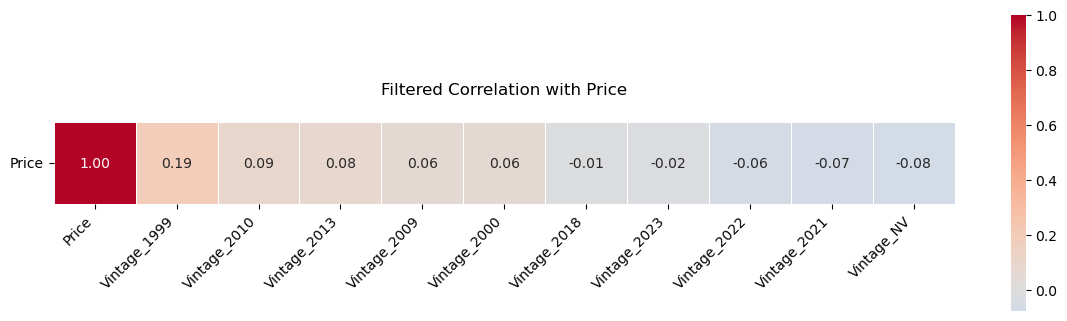

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr_matrix = df6_encoded.corr()

# Select only the 'Price' correlations
selected_vars = ['Price']
focused_corr = corr_matrix.loc[selected_vars].squeeze()

# Sort correlations in descending order
sorted_corr = focused_corr.sort_values(ascending=False)

# Select the largest 6 correlations (most positive) and smallest 5 correlations (most negative)
top_6 = sorted_corr.head(6)  # Largest 6 correlations
bottom_5 = sorted_corr.tail(5)  # Smallest 5 correlations

# Combine the largest 6 and smallest 5 correlations
filtered_corr = pd.concat([top_6, bottom_5])

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 4))

sns.heatmap(
    filtered_corr.to_frame().T,  # Convert Series to DataFrame for heatmap
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Filtered Correlation with Price', pad=20)

plt.show()


In [62]:
df7 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Reviewers', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation', 'Description', 'Ratings'])

In [63]:
df7.loc[:, 'Ratings'] = pd.to_numeric(df7['Ratings'], errors='coerce')
df7.loc[:, 'Price'] = pd.to_numeric(df7['Price'], errors='coerce')
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3290
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            1544 non-null   object 
 1   Product             1544 non-null   object 
 2   Link                1544 non-null   object 
 3   Price               1544 non-null   float64
 4   Stock Availability  1544 non-null   int64  
 5   Bottle Size         1544 non-null   object 
 6   Ratings             1049 non-null   object 
 7   Reviewers           1544 non-null   object 
 8   Description         1544 non-null   object 
 9   Vintage             1544 non-null   object 
 10  Variety             1544 non-null   object 
 11  Region              1544 non-null   object 
 12  Color/Type          1544 non-null   object 
 13  Country             1544 non-null   object 
 14  Appellation         1544 non-null   object 
 15  SubRegion           64 non-null     object 
dtypes: float64(

In [64]:
# Ensure df3 is a copy of the DataFrame, not a view
df7 = df7.copy()

# Define a normalization function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Group by "Reviewers" and normalize "Ratings" within each group
df7['Normalized_Ratings'] = df7.groupby('Reviewers')['Ratings'].transform(normalize)

print(df7[['Reviewers', 'Ratings', 'Normalized_Ratings']].head())


  Reviewers Ratings Normalized_Ratings
0        VM    99.0           0.916667
1        VM    97.0               0.75
2        JM     NaN                NaN
3        WA     NaN                NaN
4        VM    99.0           0.916667


In [65]:
df7 = df7[['Price', 'Ratings', 'Normalized_Ratings', 'Vintage']]
df7_encoded = pd.get_dummies(df7, columns=['Vintage'])

In [66]:
df7_encoded = df7_encoded.dropna(subset=['Ratings'])

In [67]:
column_sums = df7_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                  148081.66
Ratings                  98080.5
Normalized_Ratings    555.838961
Vintage_1990                   1
Vintage_1992                   1
Vintage_1994                   1
Vintage_1995                   4
Vintage_1996                   3
Vintage_1997                   1
Vintage_1998                   3
Vintage_1999                   6
Vintage_2000                  10
Vintage_2001                   2
Vintage_2003                   2
Vintage_2004                   6
Vintage_2005                   6
Vintage_2006                   1
Vintage_2008                   2
Vintage_2009                   8
Vintage_2010                  10
Vintage_2011                   1
Vintage_2012                   9
Vintage_2013                  11
Vintage_2014                  12
Vintage_2015                  47
Vintage_2016                  71
Vintage_2017                  60
Vintage_2018                 100
Vintage_2019                 186
Vintage_2020                 132
Vintage_20

In [68]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df7_encoded = df7_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df7_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                  148081.66
Ratings                  98080.5
Normalized_Ratings    555.838961
Vintage_2000                  10
Vintage_2009                   8
Vintage_2010                  10
Vintage_2012                   9
Vintage_2013                  11
Vintage_2014                  12
Vintage_2015                  47
Vintage_2016                  71
Vintage_2017                  60
Vintage_2018                 100
Vintage_2019                 186
Vintage_2020                 132
Vintage_2021                 175
Vintage_2022                 122
Vintage_2023                  31
Vintage_NV                    25
dtype: object


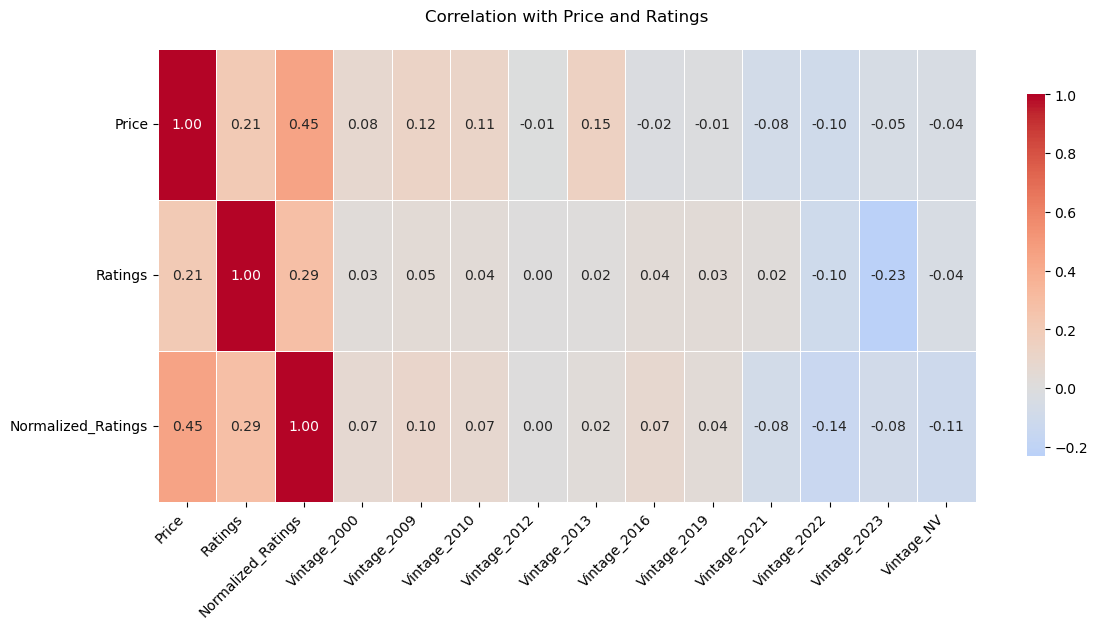

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute the correlation matrix
corr_matrix = df7_encoded.corr()

# Select specific rows for filtering
selected_vars = ['Price', 'Ratings', 'Normalized_Ratings']
focused_corr = corr_matrix.loc[selected_vars]

# Find all relevant columns across the top 7 and bottom 4 correlations for all rows
relevant_columns = set()
for var in selected_vars:
    sorted_corr = focused_corr.loc[var].sort_values(ascending=False)
    top_7 = sorted_corr.head(7).index  # Indices of the top 7 correlations
    bottom_4 = sorted_corr.tail(4).index  # Indices of the bottom 4 correlations
    relevant_columns.update(top_7)
    relevant_columns.update(bottom_4)

# Convert relevant_columns to a list for indexing
relevant_columns = list(relevant_columns)

# Create the filtered correlation matrix including all relevant columns
filtered_corr = focused_corr[relevant_columns]

# Reorganize the columns to ensure "Price", "Ratings", and "Normalized_Ratings" are first
desired_order = ["Price", "Ratings", "Normalized_Ratings"]
remaining_columns = [col for col in corr_matrix.columns if col in relevant_columns and col not in desired_order]
new_column_order = desired_order + remaining_columns
filtered_corr = filtered_corr[new_column_order]

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 6))  # Adjust the height for multiple rows

sns.heatmap(
    filtered_corr,  # Use the reordered DataFrame for the heatmap
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Correlation with Price and Ratings', pad=20)

plt.show()


# Variety EDA
### Variety analysis shows us the most well-rounded information out of any column. Many varieties have slight correlations, both positively and negatively, towards price and ratings. This means this can be a column that can be heavily influential when used in a model.

In [70]:
df8 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation'])

In [71]:
df8 = df8.drop(columns=['Ratings', 'Reviewers', 'Description', 'SubRegion'])

In [72]:
df8.loc[:, 'Price'] = pd.to_numeric(df8['Price'], errors='coerce')
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            2773 non-null   object 
 1   Product             2773 non-null   object 
 2   Link                2773 non-null   object 
 3   Price               2773 non-null   float64
 4   Stock Availability  2773 non-null   int64  
 5   Bottle Size         2773 non-null   object 
 6   Vintage             2773 non-null   object 
 7   Variety             2773 non-null   object 
 8   Region              2773 non-null   object 
 9   Color/Type          2773 non-null   object 
 10  Country             2773 non-null   object 
 11  Appellation         2773 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 281.6+ KB


In [73]:
df8 = df8[['Price', 'Variety']]
df8_encoded = pd.get_dummies(df8, columns=['Variety'])

In [74]:
df8_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 0 to 3312
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Price                                2773 non-null   float64
 1   Variety_Aglianico                    2773 non-null   bool   
 2   Variety_Albarino                     2773 non-null   bool   
 3   Variety_Arneis                       2773 non-null   bool   
 4   Variety_Barbera                      2773 non-null   bool   
 5   Variety_Cabernet Franc               2773 non-null   bool   
 6   Variety_Cabernet Sauvignon           2773 non-null   bool   
 7   Variety_Carignan/Carignano           2773 non-null   bool   
 8   Variety_Carmenere                    2773 non-null   bool   
 9   Variety_Carricante                   2773 non-null   bool   
 10  Variety_Champagne                    2773 non-null   bool   
 11  Variety_Chardonnay                 

In [75]:
column_sums = df8_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                                  327938.53
Variety_Aglianico                          12.00
Variety_Albarino                            6.00
Variety_Arneis                              5.00
Variety_Barbera                            32.00
Variety_Cabernet Franc                     22.00
Variety_Cabernet Sauvignon                107.00
Variety_Carignan/Carignano                  2.00
Variety_Carmenere                           2.00
Variety_Carricante                          1.00
Variety_Champagne                          65.00
Variety_Chardonnay                        261.00
Variety_Chenin Blanc                       15.00
Variety_Dolcetto                            9.00
Variety_Frappato                            2.00
Variety_Gamay                              18.00
Variety_Grenache/Garnacha/Cannonau          8.00
Variety_Gruner Veltliner                    4.00
Variety_Madeira                            32.00
Variety_Malbec                             10.00
Variety_Merlot      

In [76]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df8_encoded = df8_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df8_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                                 327938.53
Variety_Aglianico                         12.00
Variety_Barbera                           32.00
Variety_Cabernet Franc                    22.00
Variety_Cabernet Sauvignon               107.00
Variety_Champagne                         65.00
Variety_Chardonnay                       261.00
Variety_Chenin Blanc                      15.00
Variety_Dolcetto                           9.00
Variety_Gamay                             18.00
Variety_Grenache/Garnacha/Cannonau         8.00
Variety_Madeira                           32.00
Variety_Malbec                            10.00
Variety_Merlot                            11.00
Variety_Misc Red                         133.00
Variety_Misc White                       158.00
Variety_Montepulciano                     10.00
Variety_Nebbiolo                         206.00
Variety_Pinot Gris/Pinot Grigio           12.00
Variety_Pinot Noir/Pinot Nero            276.00
Variety_Port        

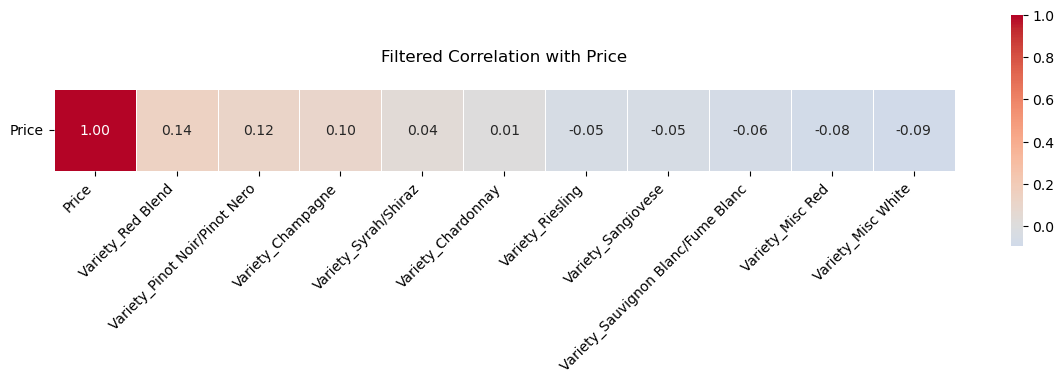

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr_matrix = df8_encoded.corr()

# Select only the 'Price' correlations
selected_vars = ['Price']
focused_corr = corr_matrix.loc[selected_vars].squeeze()

# Sort correlations in descending order
sorted_corr = focused_corr.sort_values(ascending=False)

# Select the largest 6 correlations (most positive) and smallest 5 correlations (most negative)
top_6 = sorted_corr.head(6)  # Largest 6 correlations
bottom_5 = sorted_corr.tail(5)  # Smallest 5 correlations

# Combine the largest 6 and smallest 5 correlations
filtered_corr = pd.concat([top_6, bottom_5])

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 4))

sns.heatmap(
    filtered_corr.to_frame().T,  # Convert Series to DataFrame for heatmap
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    square=True,  # Make the cells square
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Filtered Correlation with Price', pad=20)

plt.show()


In [78]:
df9 = df.dropna(subset=['Producer', 'Stock Availability', 'Bottle Size', 'Reviewers', 'Vintage',
                'Variety', 'Region', 'Color/Type', 'Country', 'Appellation', 'Description', 'Ratings'])

In [79]:
df9.loc[:, 'Ratings'] = pd.to_numeric(df9['Ratings'], errors='coerce')
df9.loc[:, 'Price'] = pd.to_numeric(df9['Price'], errors='coerce')
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3290
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producer            1544 non-null   object 
 1   Product             1544 non-null   object 
 2   Link                1544 non-null   object 
 3   Price               1544 non-null   float64
 4   Stock Availability  1544 non-null   int64  
 5   Bottle Size         1544 non-null   object 
 6   Ratings             1049 non-null   object 
 7   Reviewers           1544 non-null   object 
 8   Description         1544 non-null   object 
 9   Vintage             1544 non-null   object 
 10  Variety             1544 non-null   object 
 11  Region              1544 non-null   object 
 12  Color/Type          1544 non-null   object 
 13  Country             1544 non-null   object 
 14  Appellation         1544 non-null   object 
 15  SubRegion           64 non-null     object 
dtypes: float64(

In [80]:
# Ensure df3 is a copy of the DataFrame, not a view
df9 = df9.copy()

# Define a normalization function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Group by "Reviewers" and normalize "Ratings" within each group
df9['Normalized_Ratings'] = df9.groupby('Reviewers')['Ratings'].transform(normalize)

print(df9[['Reviewers', 'Ratings', 'Normalized_Ratings']].head())


  Reviewers Ratings Normalized_Ratings
0        VM    99.0           0.916667
1        VM    97.0               0.75
2        JM     NaN                NaN
3        WA     NaN                NaN
4        VM    99.0           0.916667


In [81]:
df9 = df9[['Price', 'Ratings', 'Normalized_Ratings', 'Variety']]
df9_encoded = pd.get_dummies(df9, columns=['Variety'])

In [82]:
df9_encoded = df9_encoded.dropna(subset=['Ratings'])

In [83]:
column_sums = df9_encoded.sum()

print("Sum of each column:")
column_sums

Sum of each column:


Price                                   148081.66
Ratings                                   98080.5
Normalized_Ratings                     555.838961
Variety_Aglianico                               4
Variety_Arneis                                  1
Variety_Barbera                                17
Variety_Cabernet Franc                          7
Variety_Cabernet Sauvignon                     57
Variety_Carignan/Carignano                      1
Variety_Carmenere                               2
Variety_Carricante                              1
Variety_Champagne                              32
Variety_Chardonnay                             77
Variety_Chenin Blanc                            7
Variety_Dolcetto                                2
Variety_Frappato                                0
Variety_Gamay                                   8
Variety_Grenache/Garnacha/Cannonau              2
Variety_Gruner Veltliner                        3
Variety_Madeira                                 4


In [84]:
# Identify columns with sum greater than 7
columns_to_keep = column_sums[column_sums > 7].index

# Filter the DataFrame to keep only these columns
df9_encoded = df9_encoded[columns_to_keep]

# Calculate column sums for the filtered DataFrame
filtered_column_sums = df9_encoded.sum()

# Print the sums of each column
print("Sum of each column:")
print(filtered_column_sums)

Sum of each column:
Price                                  148081.66
Ratings                                  98080.5
Normalized_Ratings                    555.838961
Variety_Barbera                               17
Variety_Cabernet Sauvignon                    57
Variety_Champagne                             32
Variety_Chardonnay                            77
Variety_Gamay                                  8
Variety_Misc Red                              29
Variety_Misc White                            35
Variety_Nebbiolo                             141
Variety_Pinot Noir/Pinot Nero                 58
Variety_Port                                  30
Variety_Red Blend                            267
Variety_Riesling                              34
Variety_Sangiovese                            88
Variety_Sauvignon Blanc/Fume Blanc            17
Variety_Syrah/Shiraz                          46
Variety_Tempranillo                           14
Variety_White blend                           21


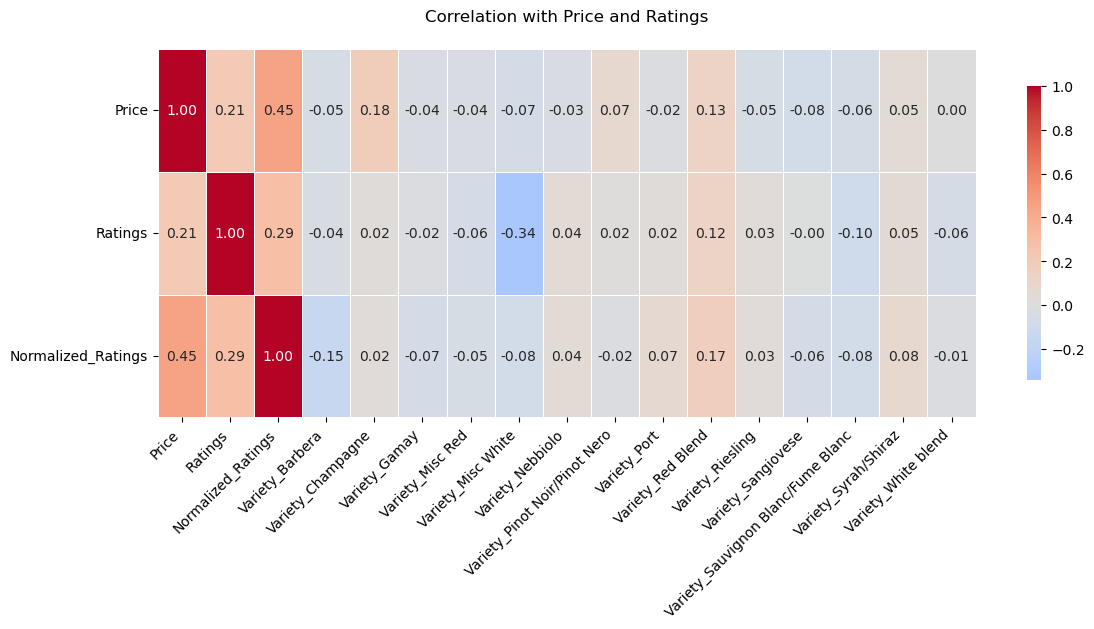

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute the correlation matrix
corr_matrix = df9_encoded.corr()

# Select specific rows for filtering
selected_vars = ['Price', 'Ratings', 'Normalized_Ratings']
focused_corr = corr_matrix.loc[selected_vars]

# Find all relevant columns across the top 7 and bottom 4 correlations for all rows
relevant_columns = set()
for var in selected_vars:
    sorted_corr = focused_corr.loc[var].sort_values(ascending=False)
    top_7 = sorted_corr.head(7).index  # Indices of the top 7 correlations
    bottom_4 = sorted_corr.tail(4).index  # Indices of the bottom 4 correlations
    relevant_columns.update(top_7)
    relevant_columns.update(bottom_4)

# Convert relevant_columns to a list for indexing
relevant_columns = list(relevant_columns)

# Create the filtered correlation matrix including all relevant columns
filtered_corr = focused_corr[relevant_columns]

# Reorganize the columns to ensure "Price", "Ratings", and "Normalized_Ratings" are first
desired_order = ["Price", "Ratings", "Normalized_Ratings"]
remaining_columns = [col for col in corr_matrix.columns if col in relevant_columns and col not in desired_order]
new_column_order = desired_order + remaining_columns
filtered_corr = filtered_corr[new_column_order]

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 6))  # Adjust the height for multiple rows

sns.heatmap(
    filtered_corr,  # Use the reordered DataFrame for the heatmap
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Format correlation values to 2 decimal places
    linewidths=0.5,  # Add grid lines
    cbar_kws={'shrink': .8}  # Customize the colorbar
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.title('Correlation with Price and Ratings', pad=20)

plt.show()
